In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:

df.info()


print(df.dtypes)


df.head()


print("\nChurn distribution:")
print(df['Churn'].value_counts())


df['Churn_flag'] = df['Churn'].map({'Yes': 1, 'No': 0})


correlation = df.corr(numeric_only=True)
print("\nCorrelaciones con Churn_flag:")
print(correlation['Churn_flag'].sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [10]:

print(df.isnull().sum())


df = df.drop_duplicates()

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].unique()}")


for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


customerID                     0
Churn                          0
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
Churn_flag                   224
dtype: int64
customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn:
['No' 'Yes' '']
customer.gender:
['Female' 'Male']
customer.Partner:
['Yes' 'No']
customer.Dependents:
['Yes' 'No']
phone.PhoneService:
['Yes' 'No']
phone.Mu

In [14]:

df.rename(columns={
    'account.Charges.Total': 'total_charges',
    'account.Charges.Monthly': 'monthly_charges',
    'account.Contract': 'contract',
    'account.PaymentMethod': 'payment_method',
    'internet.InternetService': 'internet_service',
}, inplace=True)


df['monthly_charges'] = pd.to_numeric(df['monthly_charges'], errors='coerce')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

df['total_charges'] = df['total_charges'].fillna(df['total_charges'].median())


for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


for col in ['contract', 'payment_method', 'internet_service', 'churn']:
    if col in df.columns:
        df[col] = df[col].astype('category')


df.drop_duplicates(inplace=True)


print(df.isnull().sum())



customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet_service             0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
contract                     0
account.PaperlessBilling     0
payment_method               0
monthly_charges              0
total_charges                0
Churn_flag                   0
dtype: int64


In [15]:
df['cuentas_diarias'] = df['monthly_charges'] / 30

df[['monthly_charges', 'cuentas_diarias']].head()


,monthly_charges,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [16]:
print("Análisis descriptivo general (numéricas):")
print(df.describe())


print("\nMedianas:")
print(df.median(numeric_only=True))


print("\nModas:")
print(df.mode().iloc[0])


print("\nVarianzas:")
print(df.var(numeric_only=True))


print("\nDesviaciones estándar:")
print(df.std(numeric_only=True))


print("\nRangos:")
print(df.max(numeric_only=True) - df.min(numeric_only=True))


categorical_cols = ['evasión', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts())


Análisis descriptivo general (numéricas):
       customer.SeniorCitizen  customer.tenure  monthly_charges  \
count             7043.000000      7043.000000      7043.000000   
mean                 0.162147        32.371149        64.761692   
std                  0.368612        24.559481        30.090047   
min                  0.000000         0.000000        18.250000   
25%                  0.000000         9.000000        35.500000   
50%                  0.000000        29.000000        70.350000   
75%                  0.000000        55.000000        89.850000   
max                  1.000000        72.000000       118.750000   

       total_charges   Churn_flag  cuentas_diarias  
count    7043.000000  7043.000000      7043.000000  
mean     2281.906815     0.265370         2.158723  
std      2265.274362     0.441561         1.003002  
min        18.800000     0.000000         0.608333  
25%       402.225000     0.000000         1.183333  
50%      1394.550000     0.000000   

/tmp/ipython-input-20-2826470935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel')


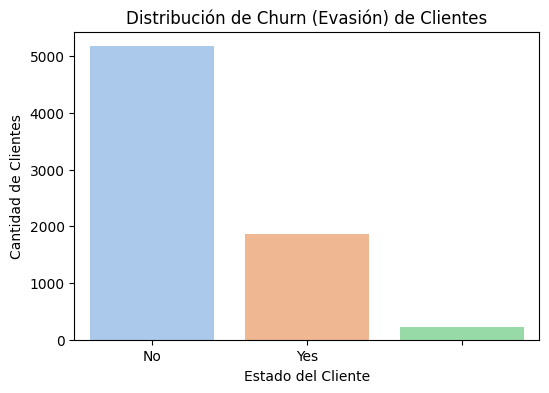

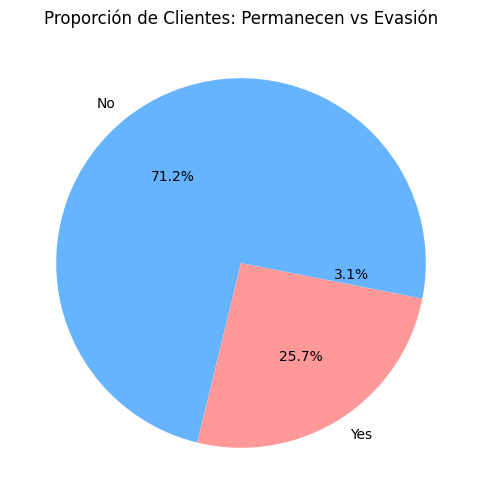

In [20]:

churn_col = 'Churn'


counts = df[churn_col].value_counts()


plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='pastel')
plt.title('Distribución de Churn (Evasión) de Clientes')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.show()


plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Clientes: Permanecen vs Evasión')
plt.show()



Distribución de evasión según 'customer.gender':
Churn                     No    Yes
customer.gender                    
Female           2.90  70.96  26.14
Male             3.27  71.43  25.31


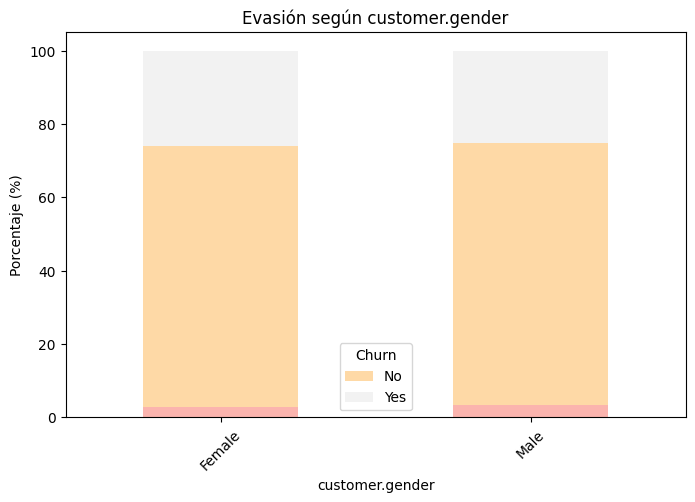


Distribución de evasión según 'account.Contract':
Churn                      No    Yes
account.Contract                    
Month-to-month    3.25  55.43  41.32
One year          3.03  86.04  10.93
Two year          2.75  94.49   2.75


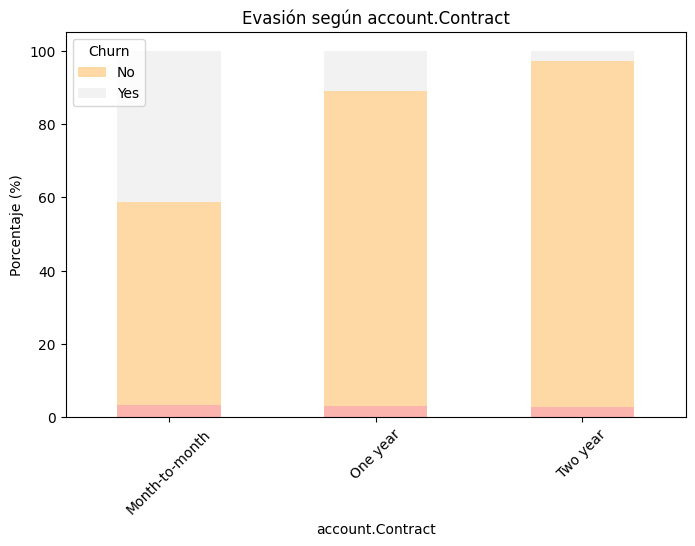


Distribución de evasión según 'account.PaymentMethod':
Churn                               No    Yes
account.PaymentMethod                        
Bank transfer (automatic)  2.83  80.93  16.24
Credit card (automatic)    2.93  82.27  14.80
Electronic check           3.27  52.92  43.80
Mailed check               3.18  78.32  18.50


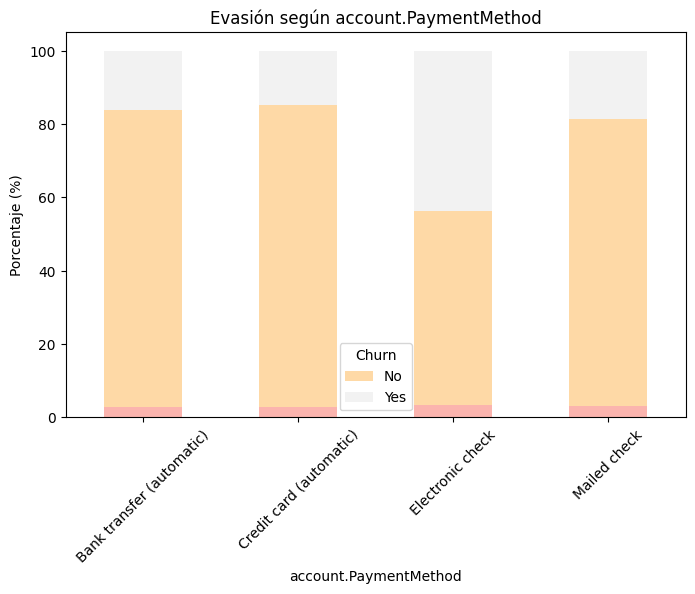


Distribución de evasión según 'internet.InternetService':
Churn                              No    Yes
internet.InternetService                    
DSL                       2.69  78.86  18.45
Fiber optic               3.19  56.25  40.56
No                        3.48  89.37   7.15


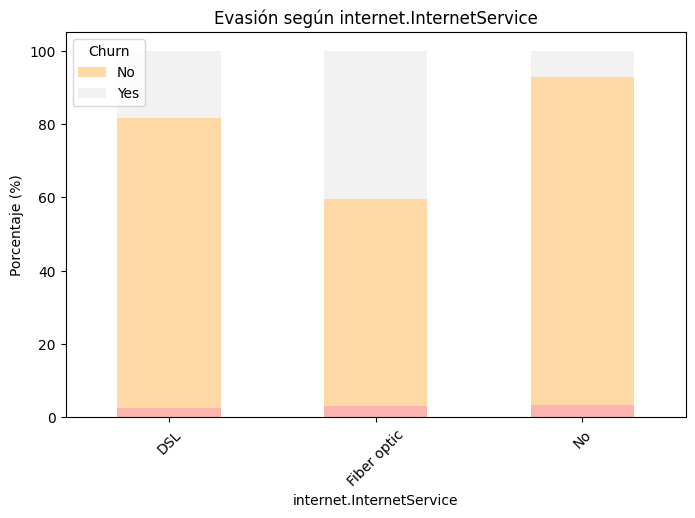

In [21]:
categorical_vars = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

target = 'Churn'

for var in categorical_vars:
    if var in df.columns:
        print(f"\nDistribución de evasión según '{var}':")


        crosstab = pd.crosstab(df[var], df[target], normalize='index') * 100
        print(crosstab.round(2))


        crosstab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
        plt.title(f"Evasión según {var}")
        plt.ylabel('Porcentaje (%)')
        plt.xlabel(var)
        plt.legend(title=target)
        plt.xticks(rotation=45)
        plt.show()


Análisis de 'account.Charges.Total' según evasión (Churn):
      count unique    top freq
Churn                         
        224    223  19.55    2
No     5174   4966          11
Yes    1869   1732   20.2    6


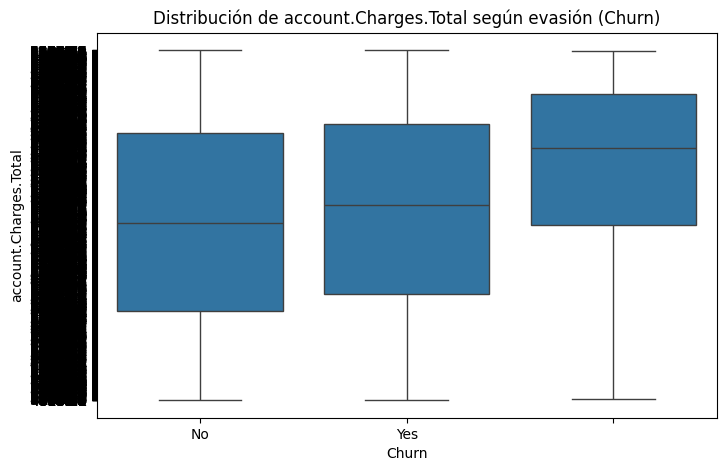


Análisis de 'customer.tenure' según evasión (Churn):
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


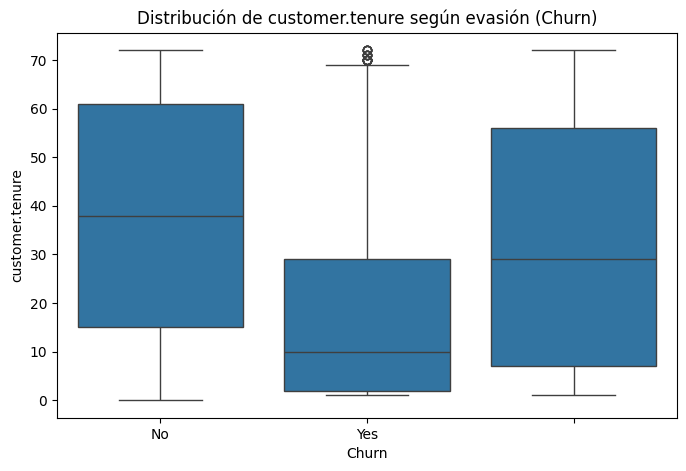


Análisis de 'account.Charges.Monthly' según evasión (Churn):
        count       mean        std    min     25%     50%      75%     max
Churn                                                                      
        224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125  115.55
No     5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000  118.35


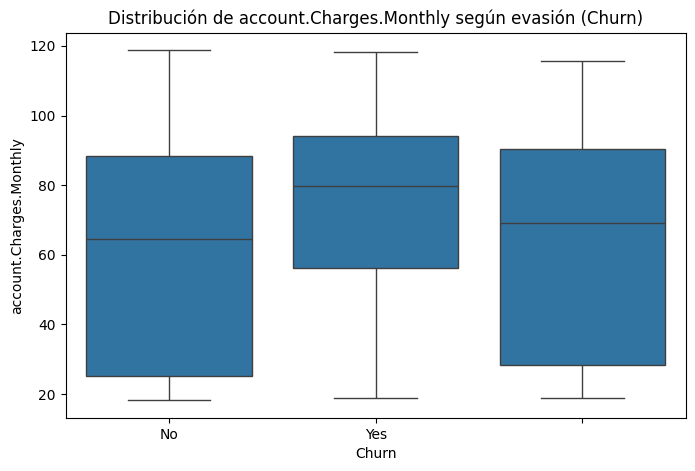

In [24]:


numeric_vars = ['account.Charges.Total', 'customer.tenure', 'account.Charges.Monthly']


target = 'Churn'

for var in numeric_vars:
    if var in df.columns:

        print(f"\nAnálisis de '{var}' según evasión (Churn):")
        print(df.groupby(target)[var].describe())


        plt.figure(figsize=(8,5))
        sns.boxplot(x=target, y=var, data=df)
        plt.title(f'Distribución de {var} según evasión (Churn)')
        plt.show()


**Informe sobre el Análisis de Evasión de Clientes (Churn)**



**Introducción **

Este análisis busca entender por qué algunos clientes deciden cancelar sus servicios en la empresa de telecomunicaciones. La evasión de clientes afecta los ingresos y el crecimiento, por eso queremos identificar qué factores hacen que un cliente se vaya para poder mejorar la retención.

**Limpieza y Preparación de Datos**

Primero cargamos los datos y revisamos cómo están organizados. Después, corregimos datos incompletos o erróneos, transformamos las columnas al tipo correcto y simplificamos los nombres para facilitar el trabajo. También creamos nuevas columnas, como el gasto diario, para tener una mejor idea del comportamiento de los clientes.

**Exploración de Datos**

Analizamos la cantidad de clientes que cancelaron y los que siguen con el servicio, con gráficos claros. Luego estudiamos variables como el género, tipo de contrato y forma de pago para ver si algunas características están relacionadas con la evasión. También comparamos variables numéricas, como el tiempo con el servicio y el total gastado, entre clientes que se quedaron y los que se fueron, para encontrar diferencias.

**Resultados y Observaciones**

Encontramos que los clientes con contratos más cortos y ciertos métodos de pago tienen más tendencia a cancelar. Los clientes que gastan menos mensualmente o llevan poco tiempo con el servicio también presentan mayor riesgo de irse. Por otro lado, el género no parece influir mucho en la decisión de cancelar.

**Sugerencias**

Recomendamos ofrecer beneficios o descuentos a clientes con contratos cortos o bajo consumo para aumentar su fidelidad. También es importante mejorar la experiencia en los métodos de pago que generan más cancelaciones. Finalmente, hacer seguimientos regulares con este tipo de análisis ayudará a detectar y actuar rápidamente para evitar pérdidas de clientes.